In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# no null values present in our dataframes

In [5]:
# checking for duplicate values
df.duplicated().value_counts()

False    5000
dtype: int64

In [6]:
#hence no duplicate values in this dataframe.

In [7]:
# 'Address' feature in our dataframe is redundant because it will produce no pattern for learning.
df.drop('Address', axis=1, inplace=True)

In [8]:
# descriptive analysis
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Exploratory Data Analysis

 Step1: Univariate Analysis

Avg. Area Income -0.03371997540427538


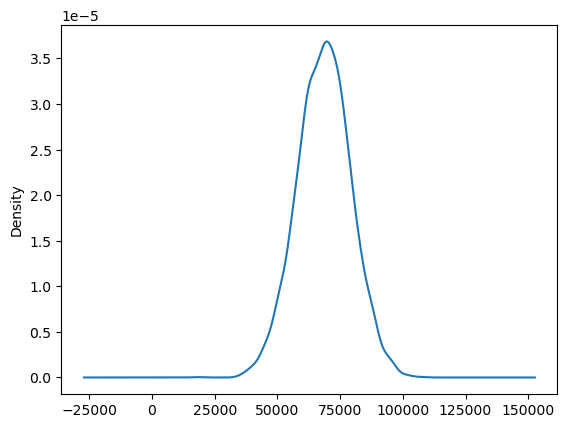

Avg. Area House Age -0.007213872365817384


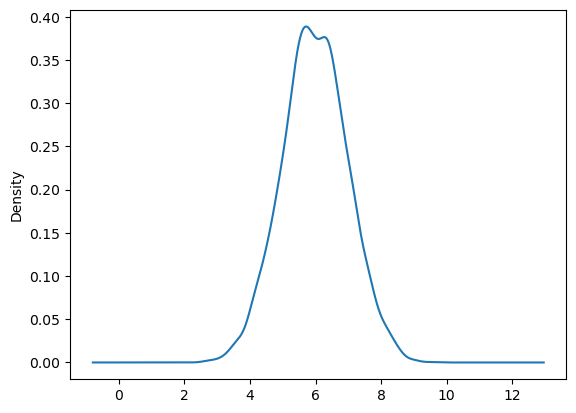

Avg. Area Number of Rooms -0.04099591018006094


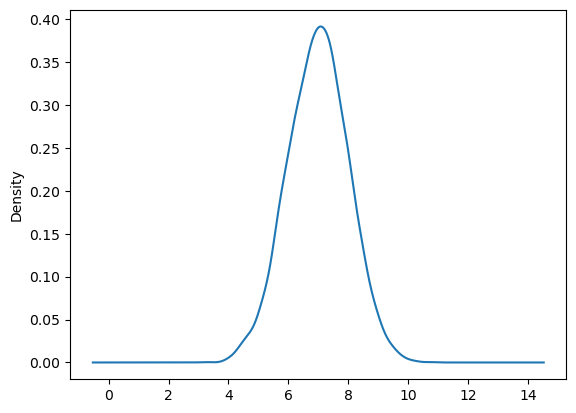

Avg. Area Number of Bedrooms 0.37624039721554303


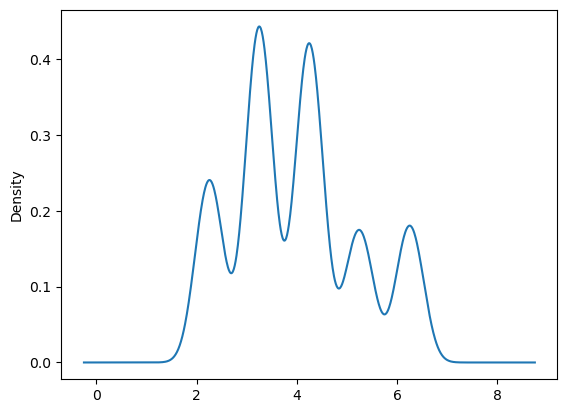

Area Population 0.05064968153215056


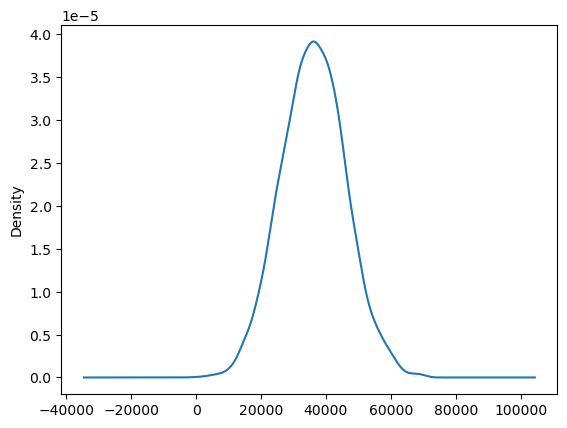

Price -0.002718064933559366


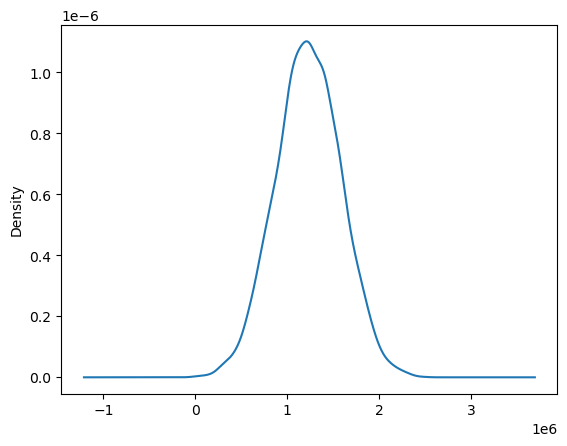

In [9]:
for col in df.columns:
    print(col, df[col].skew())
    df[col].plot(kind='kde')
    plt.show()

In [10]:
# All the features are not so much skewed, so we can avoid outlier treatment , because there are no outliers here.

 Step2. Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


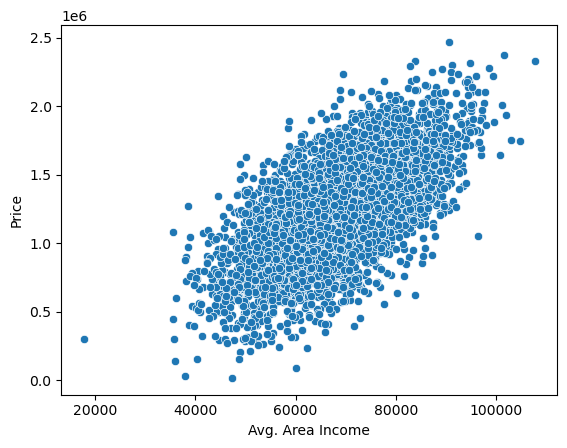

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


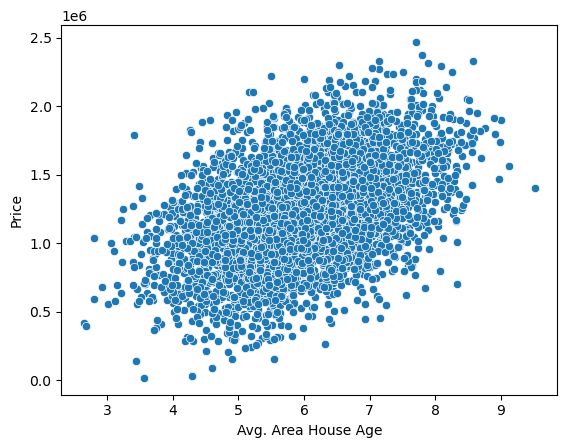

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


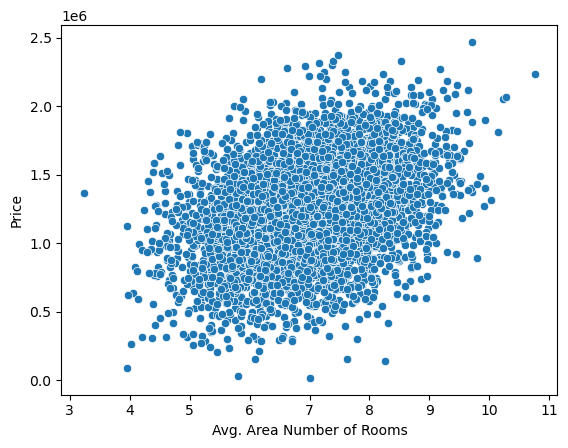

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


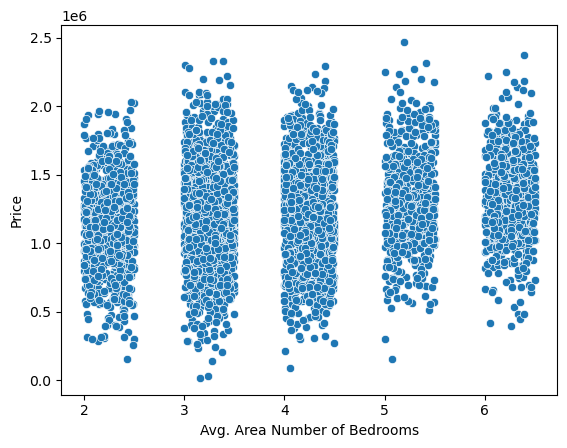

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


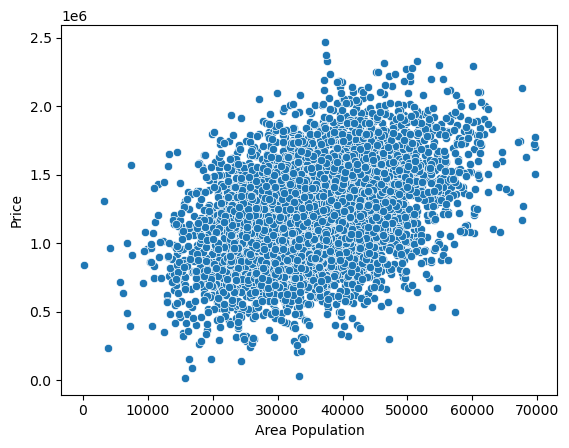

In [11]:
feat_col = df.drop('Price', axis=1).select_dtypes(include=np.number)
for col in feat_col:
    sns.scatterplot(df[col], df['Price'])
    plt.show()

In [12]:
#  By observing the scatterplot of price vs Avg. Area Number of Bedrooms, we can infer that it is good to do
# Feature Engineering on Avg. Area Number of Bedrooms
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(lambda x: 
                                                                             '2 to 3' if x>=2 and x<3 else '3 to 4'
                                                                             if x>=3 and x<4 else '4 to 5'
                                                                             if x>=4 and x<5 else '5 to 6'
                                                                             if x>=5 and x<6 else '6 to 7'
                                                                             if x>=6 and x<7 else x)

In [13]:
df['Avg. Area Number of Bedrooms'].unique()

array(['4 to 5', '3 to 4', '5 to 6', '2 to 3', '6 to 7'], dtype=object)

In [14]:
num_col = df.drop('Price', axis=1).select_dtypes(include=np.number)
cat_col = df.select_dtypes(include=object)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


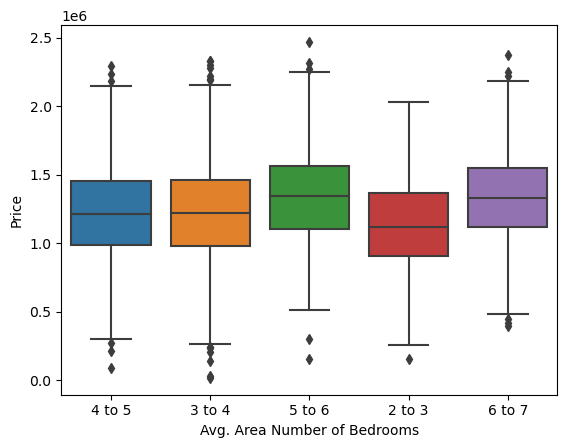

In [15]:
for col in cat_col:
    sns.boxplot(df[col], df['Price'])

In [16]:
# from the plot we can observe that there are differnt means for different categorisation.
# Let's check our assumptions with the help of hypothesis testsing
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, kruskal, pearsonr, spearmanr, f_oneway

In [17]:
br_23 = df[df['Avg. Area Number of Bedrooms']=='2 to 3']['Price']
br_34 = df[df['Avg. Area Number of Bedrooms']=='3 to 4']['Price']
br_45 = df[df['Avg. Area Number of Bedrooms']=='4 to 5']['Price']
br_56 = df[df['Avg. Area Number of Bedrooms']=='5 to 6']['Price']
br_67 = df[df['Avg. Area Number of Bedrooms']=='6 to 7']['Price']
print(shapiro(br_23)[1],shapiro(br_34)[1],shapiro(br_45)[1],shapiro(br_56)[1],shapiro(br_67)[1])

0.6119214296340942 0.9754226207733154 0.6784214377403259 0.9478431940078735 0.8752397298812866


pval > 0.05 for all , hence we can not reject the null hypothesis and conclude that data for all features are normally distributed. So we can go for parametric tests.

In [18]:
f_oneway(br_23,br_34,br_45,br_56,br_67)

F_onewayResult(statistic=45.85483402767517, pvalue=6.8624919644901e-38)

pval = 0, hence can reject the null hypothesis, therefore our inference is atleast one of the mean for different 
subcategory value is not equal.

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df['Price'],df['Avg. Area Number of Bedrooms'])

# Print the results
print(tukey_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
2 to 3 3 to 4  92457.9502    0.0  51508.3063 133407.5941   True
2 to 3 4 to 5  88615.5129    0.0   47376.597 129854.4287   True
2 to 3 5 to 6 208588.0897    0.0 157879.1939 259296.9855   True
2 to 3 6 to 7 202971.4627    0.0 152503.0186 253439.9068   True
3 to 4 4 to 5  -3842.4373 0.9982 -38663.6557   30978.781  False
3 to 4 5 to 6 116130.1395    0.0  70487.3835 161772.8956   True
3 to 4 6 to 7 110513.5125    0.0  65138.0465 155888.9784   True
4 to 5 5 to 6 119972.5769    0.0  74070.1148  165875.039   True
4 to 5 6 to 7 114355.9498    0.0  68719.2567 159992.6429   True
5 to 6 6 to 7   -5616.627 0.9986 -59962.2956  48729.0415  False
---------------------------------------------------------------


In [20]:
#group 3 to 4 and 4 to 5 have means equal to each other.
#group 5 to 6 and 6 to 7 have means equal to each other.

In [21]:
# As we have seen that, the features passed the shapiro test, hence we can go for pearson for checking the correlation 
# between numerical columns.
pval_pearson = []
for col in num_col:
    pval_pearson.append(pearsonr(df[col], df['Price'])[1])
    
pval_pearson

[0.0, 4.944750033819791e-251, 6.165892555749277e-132, 1.7363920538365547e-200]

In [22]:
# the p_val is almost equal to 0 for all the numerical features, hence we can reject the null hypothesis of pearon test,
# therefore can infer there is some linear relation between the target and individual feature.

 Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feat_arr = sc.fit_transform(num_col)
feat_df = pd.DataFrame(feat_arr, columns= num_col.columns)
enc_ft = pd.get_dummies(cat_col, drop_first=True)
X = pd.concat([feat_df, enc_ft], axis=1)
y = df['Price']

Splitting the data into train and test

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

# Building Models

In [71]:
import statsmodels.api as sm

In [72]:
Xc = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              3832.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                        0.00
Time:                        20:00:33   Log-Likelihood:                         -72499.
No. Observations:                5000   AIC:                                  1.450e+05
Df Residuals:                    4992   BIC:                                  1.451e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Avg. Area Income                     2.239e+05   6792.414     32.962      0.000    2.11e+05    2.37e+05
Avg. Area House Age                  1.592e+05   6791.512     23.440      0.000    1.46e+05    1.73e+05
Avg. Area Number of Rooms           -6.797e+04   7403.755     -9.180      0.000   -8.25e+04   -5.35e+04
Area Population                      1.527e+05   6793.628     22.471      0.000    1.39e+05    1.66e+05
Avg. Area Number of Bedrooms_3 to 4  1.212e+06   1.24e+04     97.911      0.000    1.19e+06    1.24e+06
Avg. Area Number of Bedrooms_4 to 5  1.213e+06   1.26e+04     95.923      0.000    1.19e+06    1.24e+06
Avg. Area Number of Bedrooms_5 to 6  1.386e+06   2.04e+04     67.827      0.000    1.35e+06    1.43e+06
Avg. Area Number of Bedrooms_6 to 7  1.381e+06   2.03e+04     68.146      0.000    1.34e+06    1.42e+06
==============================================================================
Omnibus:                      856.215   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1357.912
Skew:                           1.249   Prob(JB):                    1.36e-295
Kurtosis:                       3.530   Cond. No.                         3.21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking the assumptions of Linear Regression

In [29]:
# Since value of Durbin Watson is 1.687 , hence it is in the range of 1.5 to 2.5. Therefore no autocorrelation is here.

In [73]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [74]:
# Checking homoscedacticity for error terms.
het_breuschpagan(model.resid, X)

(395.97322743739227,
 1.7418478455109618e-81,
 53.66764923988564,
 4.783139196412736e-84)

pval = 0
hence we can reject null hypothesis and infer that presence of hetroscedacticity in our error terms.

In [75]:
# pvalue for jarque bera test is very less, hence reject the null hypothesis and hence infer that error is not following
# normal distribution.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('Model performance RMSE wise on test data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Model performance RMSE wise on train data: ', np.sqrt(mean_squared_error(y_train, lr_model.predict(X_train))))

Model performance RMSE wise on test data:  101695.11001296887
Model performance RMSE wise on train data:  100928.19862064302


In [78]:
# Let's use non linear model for better performance 

In [81]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, dt_regressor.predict(X_train))
print("Mean Squared Error on test data:", np.sqrt(mse_test))
print("Mean Squared Error on train data:", np.sqrt(mse_train))

Mean Squared Error on test data: 173722.86236777916
Mean Squared Error on train data: 0.0


In [82]:
# Clearly we can see our model is overfit so we need to use bagging models 


In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, rf_regressor.predict(X_train))
print("Mean Squared Error on test data:", np.sqrt(mse_test))
print("Mean Squared Error on train data:", np.sqrt(mse_train))

Mean Squared Error on test data: 120432.91864873444
Mean Squared Error on train data: 45150.51619361834


In [ ]:
# Applying grid search for further improvement in our model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
regressor = RandomForestRegressor()
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, best_regressor.predict(X_train))

In [85]:
print("Mean Squared Error on test data:", np.sqrt(mse_test))
print("Mean Squared Error on train data:", np.sqrt(mse_train))
print("Best Parameters:", grid_search.best_params_)

Mean Squared Error on test data: 119834.52818995743
Mean Squared Error on train data: 53275.911223604926
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [86]:
# Let's use KNeighbors Regression for further improvement in our model.

In [87]:
from sklearn.neighbors import KNeighborsRegressor
KN_regressor = KNeighborsRegressor(n_neighbors=5)
KN_regressor.fit(X_train, y_train)
y_pred = KN_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, KN_regressor.predict(X_train))
print("Mean Squared Error on test data:", np.sqrt(mse_test))
print("Mean Squared Error on train data:", np.sqrt(mse_train))

Mean Squared Error on test data: 134016.75394179858
Mean Squared Error on train data: 107564.0013289024


In [88]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
regressor = KNeighborsRegressor()
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, best_regressor.predict(X_train))
print("Mean Squared Error on test data:", np.sqrt(mse_test))
print("Mean Squared Error on train data:", np.sqrt(mse_train))
print("Best Parameters:", grid_search.best_params_)

Mean Squared Error on test data: 130334.0529237041
Mean Squared Error on train data: 0.0
Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


# Among all models best performing one is best_regressor model which we got by performing grid search on Random Forest    